[View in Colaboratory](https://colab.research.google.com/github/dmreagan/dipy-examples/blob/master/quick_start.ipynb)

Getting started with DIPY
=========================
In diffusion MRI (dMRI) usually we use three types of files, a Nifti file with the
diffusion weighted data, and two text files one with b-values and
one with the b-vectors.
In DIPY_ we provide tools to load and process these files and we also provide
access to publically available datasets for those who haven't acquired yet
their own datasets.
With the following commands we can download a dMRI dataset

In [2]:
!pip install dipy
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()

    100% |████████████████████████████████| 8.1MB 5.4MB/s 
    100% |████████████████████████████████| 4.2MB 10.2MB/s 
  Running setup.py bdist_wheel for nibabel ... - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/46/50/8d/bcb0b8f7c030da5bac1752fbe9cc375cbf5725fa93ba79ad84
Successfully built nibabel
Creating new folder /content/.dipy/sherbrooke_3shell
Download Progress: [----------------------------------] 0.43%  of 183.58 MB

Download Progress: [##################################] 100.00%  of 183.58 MB

Download Progress: [##################################] 100.00%  of 0.00 MBDownloading "HARDI193.bvec" to /content/.dipy/sherbrooke_3shell
Download Progress: [##################################] 100.00%  of 0.01 MBFiles successfully downloaded to /content/.dipy/sherbrooke_3shell


({'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7'),
  'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66')},
 '/content/.dipy/sherbrooke_3shell')

By default these datasets will go in the ``.dipy`` folder inside your home directory.
Here is how you can access them.

In [0]:
from os.path import expanduser, join
home = expanduser('~')

``dname`` holds the directory name where the 3 files are in.

In [0]:
dname = join(home, '.dipy', 'sherbrooke_3shell')

Here, we show the complete filenames of the 3 files

In [5]:
fdwi = join(dname, 'HARDI193.nii.gz')
print(fdwi)

fbval = join(dname, 'HARDI193.bval')
print(fbval)

fbvec = join(dname, 'HARDI193.bvec')
print(fbvec)

/content/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/content/.dipy/sherbrooke_3shell/HARDI193.bval
/content/.dipy/sherbrooke_3shell/HARDI193.bvec


Now that we have their filenames we can start checking what these look like.
Let's start first by loading the dMRI datasets. For this purpose, we
use a python library called nibabel_ which enables us to read and write
neuroimaging-specific file formats.

In [0]:
import nibabel as nib
img = nib.load(fdwi)
data = img.get_data()

``data`` is a 4D array where the first 3 dimensions are the i, j, k voxel
coordinates and the last dimension is the number of non-weighted (S0s) and
diffusion-weighted volumes.
We can very easily check the size of ``data`` in the following way:

In [7]:
print(data.shape)

(128, 128, 60, 193)


We can also check the dimensions of each voxel in the following way:

In [8]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


We can quickly visualize the results using matplotlib. For example,
let's show here the middle axial slices of volume 0 and volume 10.

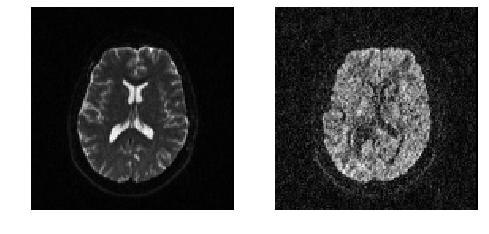

In [9]:
import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()

The next step is to load the b-values and b-vectors from the disk using
the function ``read_bvals_bvecs``.

In [0]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In DIPY, we use an object called ``GradientTable`` which holds all the
acquisition specific parameters, e.g. b-values, b-vectors, timings and others.
To create this object you can use the function ``gradient_table``.

In [0]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

Finally, you can use ``gtab`` (the GradientTable object) to show some information about the
acquisition parameters

In [12]:
print(gtab.info)

B-values shape (193,)
         min 0.000000 
         max 3500.000000 
B-vectors shape (193, 3)
         min -0.964050 
         max 0.999992 
None


You can also see the b-values using:

In [13]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

Or, for example the 10 first b-vectors using:

In [14]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


``gtab``  can be used to tell what part of the data is the S0 volumes
(volumes which correspond to b-values of 0).

In [0]:
S0s = data[:, :, :, gtab.b0s_mask]

Here, we had only 1 S0 as we can verify by looking at the dimensions of S0s

In [16]:
print(S0s.shape)

(128, 128, 60, 1)


Just for fun let's save this in a new Nifti file.

In [0]:
nib.save(nib.Nifti1Image(S0s, img.affine), 'HARDI193_S0.nii.gz')

Now that we learned how to load dMRI datasets we can start the analysis.

See example *example_reconst_dti* to learn how to create FA maps.